In [1]:
import pickle
import os
import matplotlib.pyplot as plt
os.chdir("..")

In [2]:
os.getcwd()

'C:\\Users\\Dongmin Kim\\Documents\\TSADBench'

## Load

In [3]:
from data.load_data import DataFactory
from utils.argpass import EDA_prep_arguments
from utils.logger import make_logger

In [4]:
args= EDA_prep_arguments()
logger = make_logger("EDA_logs")
datafactory = DataFactory(args=args, logger=logger)

[2023-01-04 20:56:23,965] current location: C:\Users\Dongmin Kim\Documents\TSADBench
[2023-01-04 20:56:23,967] home dir: .


In [5]:
train_X, train_y, test_X, test_y = datafactory.load_SMD()

## Stats

In [6]:
import numpy as np

In [7]:
print("=== statistics ===")
train_len, F = train_X.shape
test_len, _ = test_X.shape
anomaly_count = np.count_nonzero(test_y)
print(f"[Train] total: {train_len}, num_features: {F}")
print(f"[Test] total: {test_len}, anomaly / total: {anomaly_count}/{len(test_y)} = {anomaly_count/len(test_y):.3f}")

=== statistics ===
[Train] total: 708405, num_features: 38
[Test] total: 708420, anomaly / total: 29444/708420 = 0.042


## Visualize

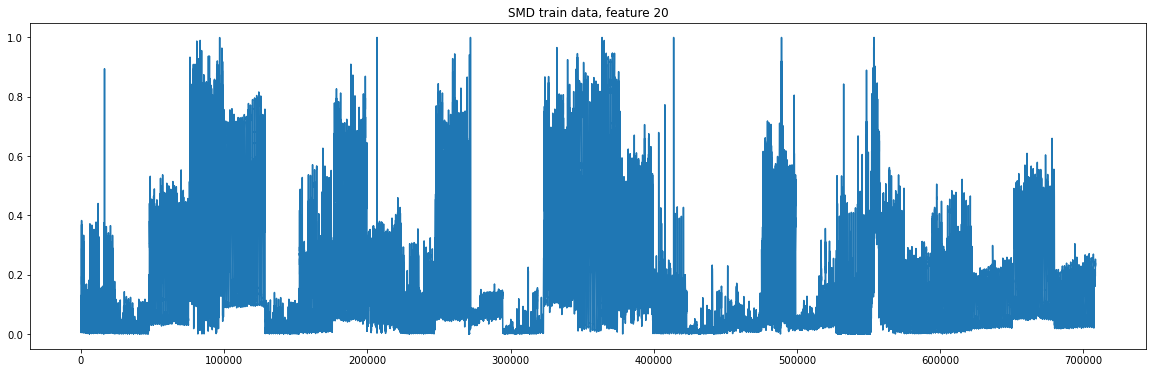

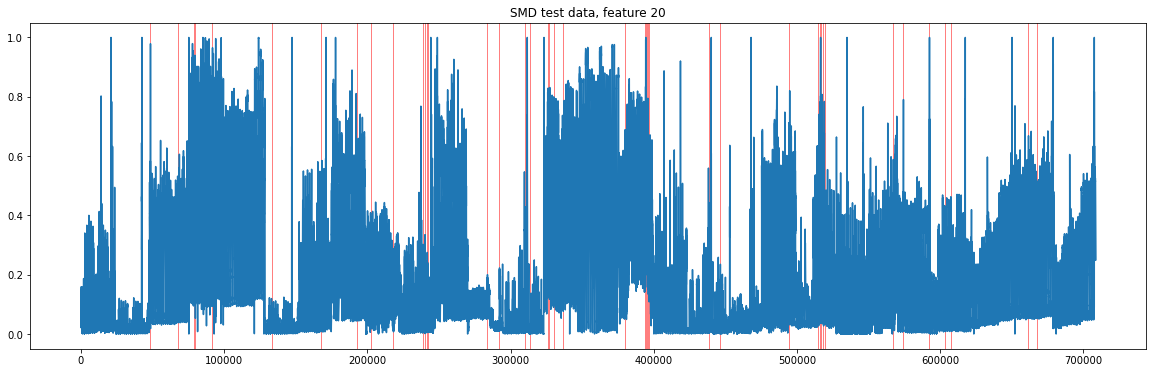

In [8]:
F = 20
dataset = "SMD"
datafactory.visualize_dataset(train_X, train_y, test_X, test_y, dataset_name=dataset, feature_idx=F)

In [9]:
import statsmodels.api as sm
train_X.shape

(708405, 38)

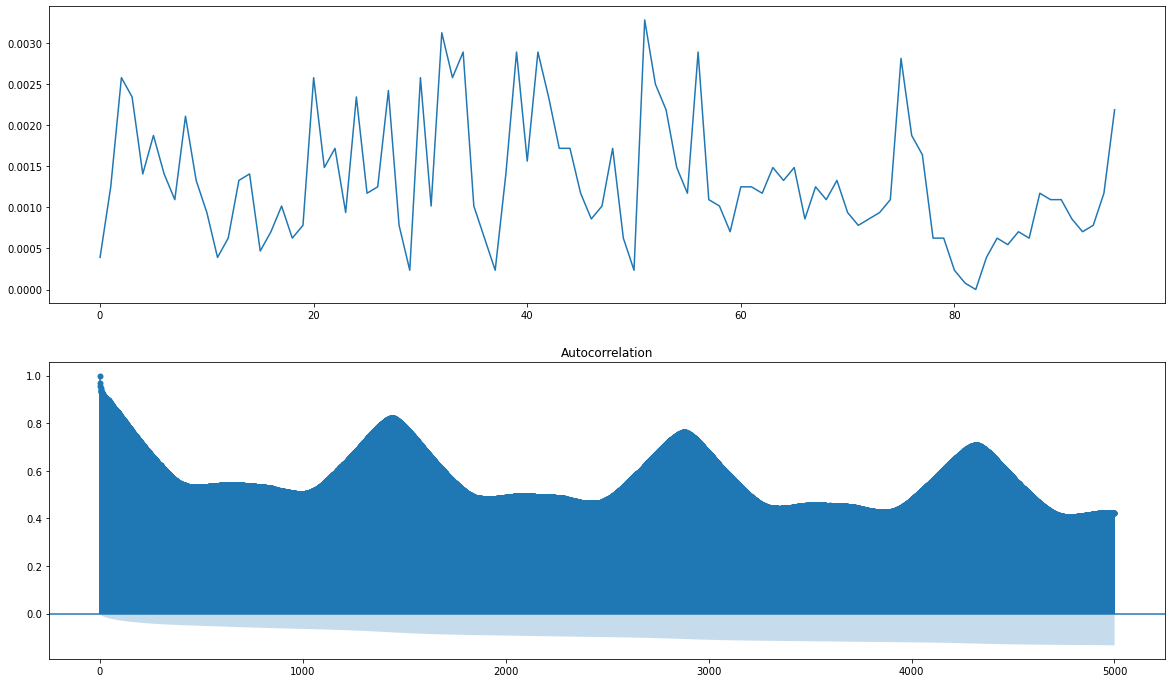

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
F = 1
D = 100
ax1.plot(train_X[D:D+args.window_size, F])
sm.graphics.tsa.plot_acf(train_X[:,F], ax2, fft=True, lags=5000)
plt.show()